# Entrega Final del Portafolio de Implemetación | Deep Learning

El punto de aprtida es la siguiente arquitectura:

```python
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Aumentación de datos para entrenar el modelo con variabilidad
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generar el conjunto de datos de entrenamiento con aumentación
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(cards_df['class index'].unique()), activation='softmax')  # Número de clases únicas
])

# Compilar el modelo con un learning rate ajustado
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo usando el generador de datos con aumentación
history = model.fit(train_generator, epochs=100, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Guardar el modelo
model.save("poker_card_classifier_model_v2.h5")

```

```9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7389 - loss: 0.9884```

## Actualización de la arquitectura según el feedback recibido

In [4]:
# Librerías necesarias
import tensorflow as tf
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
cards_df = pd.read_csv('cards.csv')  # Cambia 'cards.csv' a la ruta correcta si es necesario

# Establecer la ruta base para las imágenes
base_dir = 'dataset'  # Cambia a la ruta donde están las imágenes

# Configuración de tamaño de imagen (224x224)
img_size = (224, 224)

# Función para cargar imágenes y etiquetas de una partición específica (train, val, test)
def load_images_and_labels(df, dataset_type):
    images = []
    labels = []
    subset = df[df['data set'] == dataset_type]
    for _, row in tqdm(subset.iterrows(), total=len(subset)):
        img_path = os.path.join(base_dir, row['filepaths'])
        if os.path.exists(img_path):
            img = tf.keras.utils.load_img(img_path, target_size=img_size)
            img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalización
            images.append(img_array)
            labels.append(row['class index'])  # Usar directamente 'class index' como etiqueta
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas para train, val y test
X_train, y_train = load_images_and_labels(cards_df, 'train')
X_val, y_val = load_images_and_labels(cards_df, 'valid')
X_test, y_test = load_images_and_labels(cards_df, 'test')

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Construir el modelo ajustado
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

100%|██████████| 265/265 [00:00<00:00, 2172.29it/s]


Shape of X_train: (7624, 224, 224, 3)
Shape of y_train: (7624,)
Shape of X_val: (265, 224, 224, 3)
Shape of y_val: (265,)
Shape of X_test: (265, 224, 224, 3)
Shape of y_test: (265,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Construcción del modelo sin data augmentation
model = Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(len(cards_df['class index'].unique()), activation='softmax')  # Número de clases
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Predicción en el conjunto de prueba
y_pred = np.argmax(model.predict(X_test), axis=1)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.0902 - loss: 3.7161 - val_accuracy: 0.4189 - val_loss: 2.1805
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.4104 - loss: 2.2821 - val_accuracy: 0.5774 - val_loss: 1.6219
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.5476 - loss: 1.7074 - val_accuracy: 0.5925 - val_loss: 1.4473
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6582 - loss: 1.3344 - val_accuracy: 0.6528 - val_loss: 1.3447
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.7391 - loss: 0.9969 - val_accuracy: 0.6415 - val_loss: 1.3453
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.8243 - loss: 0.6725 - val_accuracy: 0.6604 - val_loss: 1.4761
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.8786 - loss: 0.4776 - val_accuracy: 0.7208 - val_loss: 1.3074
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9260 - loss: 0.3096 - 

KeyboardInterrupt: 

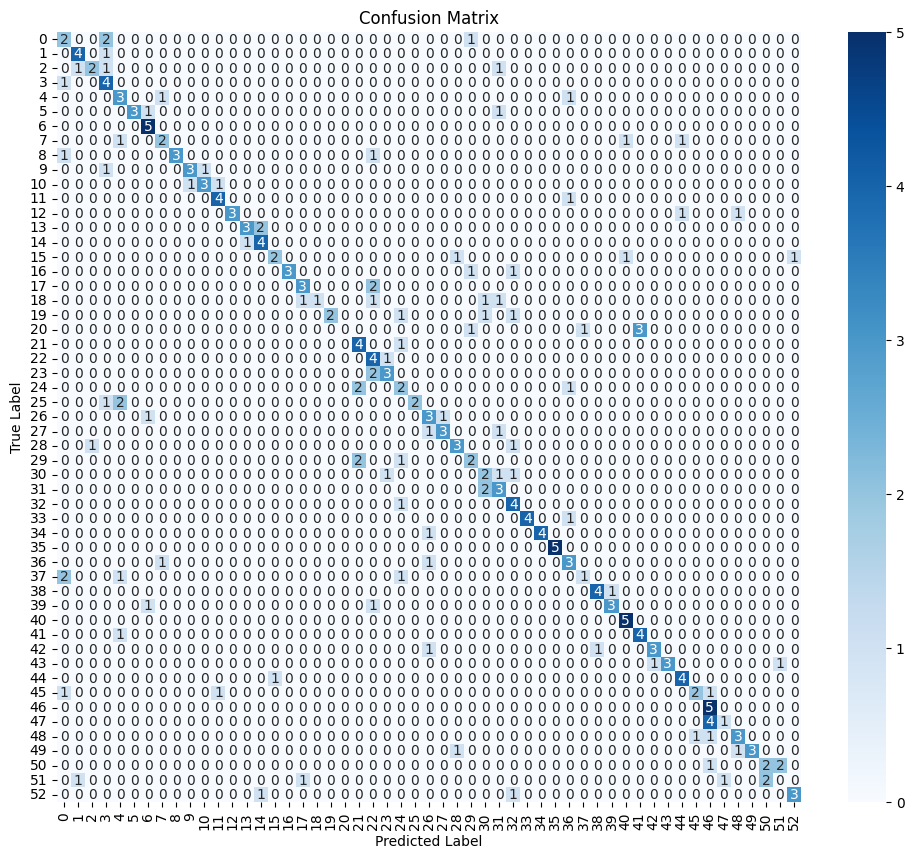

Classification Report:
                   precision    recall  f1-score   support

     ace of clubs       0.29      0.40      0.33         5
  ace of diamonds       0.67      0.80      0.73         5
    ace of hearts       0.67      0.40      0.50         5
    ace of spades       0.40      0.80      0.53         5
   eight of clubs       0.38      0.60      0.46         5
eight of diamonds       1.00      0.60      0.75         5
  eight of hearts       0.62      1.00      0.77         5
  eight of spades       0.50      0.40      0.44         5
    five of clubs       1.00      0.60      0.75         5
 five of diamonds       0.75      0.60      0.67         5
   five of hearts       0.75      0.60      0.67         5
   five of spades       0.67      0.80      0.73         5
    four of clubs       1.00      0.60      0.75         5
 four of diamonds       0.75      0.60      0.67         5
   four of hearts       0.57      0.80      0.67         5
   four of spades       0.67    

/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

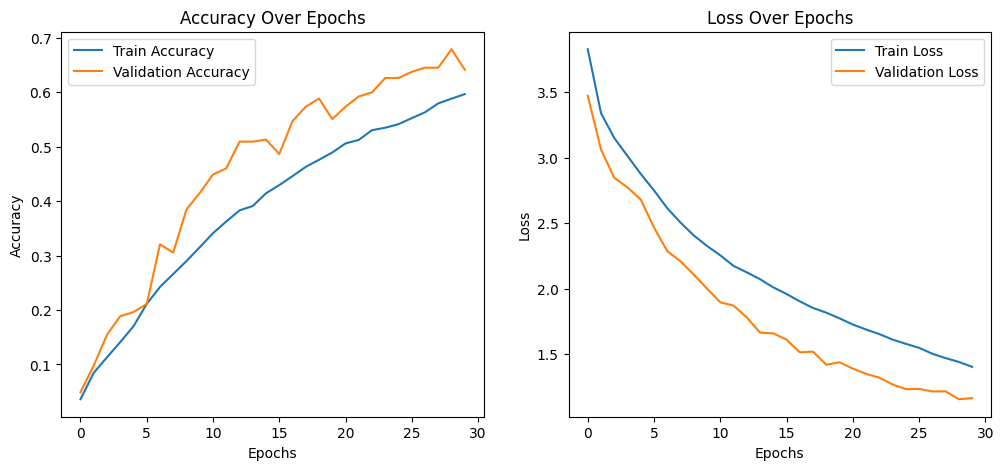

In [18]:
# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(cards_df['class index'].unique()),
            yticklabels=sorted(cards_df['class index'].unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Reporte de clasificación
class_names = sorted(cards_df['labels'].unique())
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

# Graficar desempeño
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Diferencias entre las arquitecturas

### **1. Estructura del Modelo**

**Arquitectura 1:**
- Utiliza el argumento input_shape en la primera capa Conv2D para especificar la forma de entrada.
- Incluye una capa adicional de densidad (Dense) con 256 unidades y un Dropout de 0.3.
- Arquitectura 2:
- Utiliza explícitamente una capa Input al inicio del modelo, lo cual es la convención actual en TensorFlow/Keras.
- Incluye un Dropout con una tasa de 0.2 en lugar de 0.3 y reduce el tamaño de la capa densa final a 128 unidades, simplificando la red.

**Impacto:**

- La capa Input mejora la legibilidad y es más robusta para realizar cambios futuros en la arquitectura. Además, esta práctica es más compatible con las versiones modernas de Keras.
- La simplificación en la arquitectura (menos neuronas y menor tasa de dropout) evita la sobrecarga del modelo, lo cual es beneficioso para conjuntos de datos con características estructuradas como las cartas de póker.

### **2. Manejador de Data Augmentation**

**Arquitectura 1:**
- Utiliza ImageDataGenerator para realizar data augmentation con transformaciones como rotaciones, desplazamientos y zoom.
- ImageDataGenerator está marcado como obsoleto (deprecated) en Keras.
- Arquitectura 2:
- No utiliza data augmentation, entrenando únicamente con las imágenes originales.

**Impacto:**

- Para un dataset estructurado como cartas de póker, donde las imágenes son consistentes en orientación, tamaño y características visuales, el data augmentation puede introducir ruido innecesario, dificultando la capacidad del modelo para generalizar.
- La eliminación del data augmentation en la Arquitectura 2 permitió al modelo enfocarse en aprender las características reales de las cartas, mejorando la precisión y reduciendo la pérdida.

### **3. Entrenamiento y Evaluación**

**Arquitectura 1:**
- Entrena con data augmentation, lo que introduce mayor variabilidad, pero también ruido no representativo de los datos reales.
- Se entrena por 100 épocas con un generador de datos, lo que puede ser innecesario dado el tamaño del dataset.
- Arquitectura 2:
- Entrena directamente con las imágenes originales, eliminando el ruido adicional.
- Se entrena por 10 épocas, ajustando mejor la complejidad del modelo al dataset.

**Impacto:**

- Entrenar directamente con imágenes originales permite que el modelo aprenda patrones más precisos sin verse afectado por transformaciones que no ocurren en el conjunto de prueba.
- Reducir las épocas de entrenamiento disminuye el riesgo de sobreajuste.

### **4. Evaluación Ampliada**

**Arquitectura 1:**
- No incluye herramientas para una evaluación detallada como matriz de confusión o métricas adicionales (precisión, recall, F1-score).
- Esto dificulta el análisis de errores y la identificación de clases problemáticas.
- Arquitectura 2:
- Expande la evaluación del modelo, incluyendo:
- Matriz de confusión: Proporciona un análisis detallado de las clases mal clasificadas.
- Reporte de clasificación: Calcula precisión, recall y F1-score para cada clase.

**Impacto:**

- La evaluación ampliada en la Arquitectura 2 permite comprender mejor el desempeño del modelo y realizar ajustes informados.